In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [327]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=25, random_state=42)
y = y + 50 * np.sin(X[:, 0]) 

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

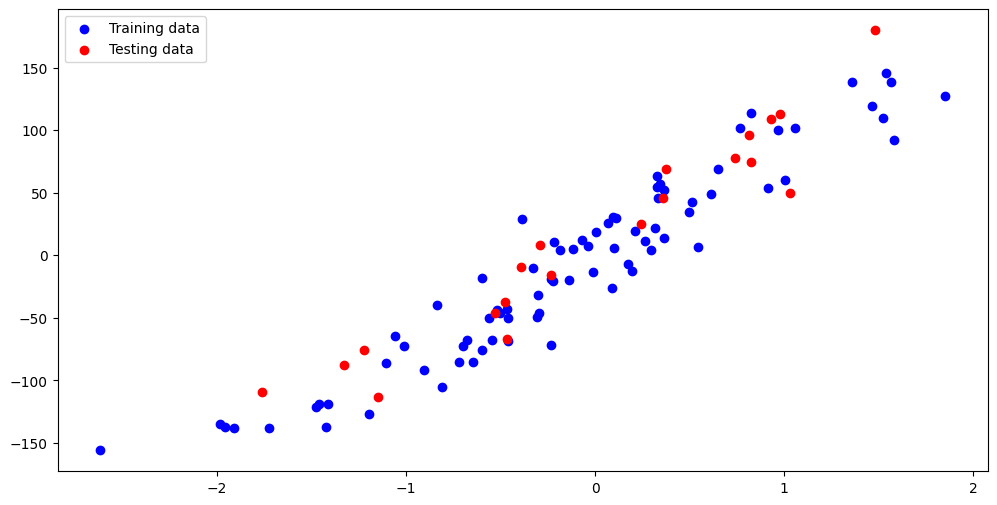

In [329]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label = 'Training data', color='b')
plt.scatter(X_test, y_test, label='Testing data', color='r')
plt.legend()
plt.show()

## R2-Score when using Linear Regression

In [330]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_)
print(lr.intercept_)

[80.05748133]
0.6999917373666005


In [331]:
y_pred = lr.predict(X_test)
y_pred

array([-105.63123808,  119.01646663,   65.74876259,  -30.69119941,
        -18.04573769,  -22.65227519,  -36.58515931, -140.44456259,
         66.49943614,   75.25593249,   83.23921676,   29.28952476,
        -97.03767598,  -41.71127589,  -91.4456551 ,  -37.66149086,
         78.79967754,   20.07088178,   59.81976618,   30.77742883])

In [332]:
r2_score(y_test, y_pred)

0.8874034600709699

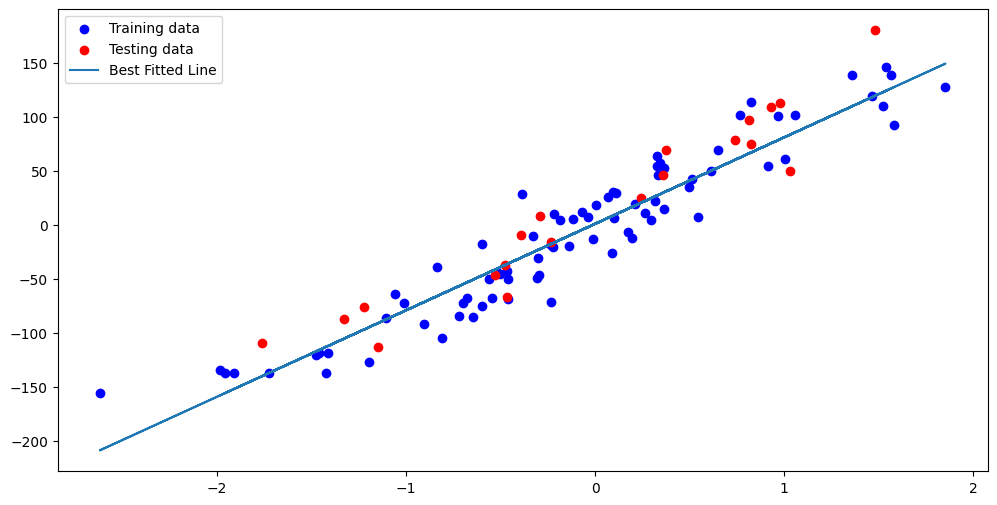

In [333]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label = 'Training data', color='b')
plt.scatter(X_test, y_test, label='Testing data', color='r')
plt.plot(X_train, lr.predict(X_train), label = 'Best Fitted Line')
plt.legend()
plt.show()

## R2-Score when using L2 Regularization (Ridge Regression)

In [334]:
ridge1 = Ridge(alpha=0) # When alpha = 0, ridge regression becomes linera regression
ridge1.fit(X,y)

print(ridge1.coef_)
print(ridge1.intercept_)

y_pred = ridge1.predict(X_test)

r2_score(y_test, y_pred)

[81.71034366]
3.650260951292335


0.9009975190246784

In [335]:
ridge2 = Ridge(alpha=1) 
ridge2.fit(X,y)

print(ridge2.coef_)
print(ridge2.intercept_)

y_pred = ridge2.predict(X_test)

r2_score(y_test, y_pred)

[80.72173931]
3.547597832521472


0.8993197444195453

In [336]:
ridge3 = Ridge(alpha=10) 
ridge3.fit(X,y)

print(ridge3.coef_)
print(ridge3.intercept_)

y_pred = ridge3.predict(X_test)

r2_score(y_test, y_pred)

[72.79508289]
2.7244421688137166


0.8771030208996846

In [337]:
ridge4 = Ridge(alpha=100) 
ridge4.fit(X,y)

print(ridge4.coef_)
print(ridge4.intercept_)

y_pred = ridge4.predict(X_test)

r2_score(y_test, y_pred)

[36.72859563]
-1.0209369282860359


0.5792363157974352

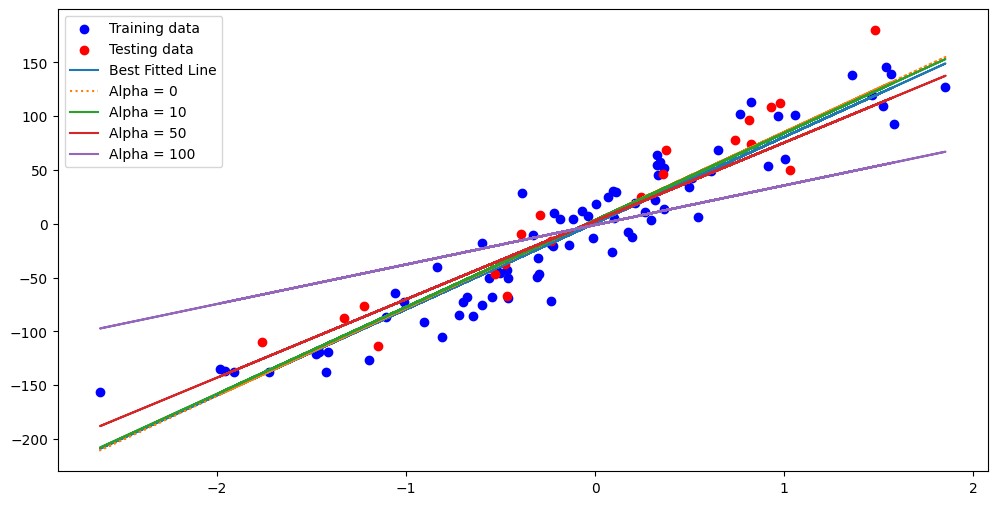

In [338]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label = 'Training data', color='b')
plt.scatter(X_test, y_test, label='Testing data', color='r')
plt.plot(X_train, lr.predict(X_train), label = 'Best Fitted Line')
plt.plot(X_train, ridge1.predict(X_train), label = 'Alpha = 0', linestyle=':')
plt.plot(X_train, ridge2.predict(X_train), label = 'Alpha = 10')
plt.plot(X_train, ridge3.predict(X_train), label = 'Alpha = 50')
plt.plot(X_train, ridge4.predict(X_train), label = 'Alpha = 100')
plt.legend()
plt.show()